In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Contact fraction

In [2]:
def contacts_stats(dir):
    dir = str(dir)
    nmr = np.load(dir+'/nmr_contactfraction.npy')
    arg = np.load(dir+'/arginines_contactfraction.npy')
    return nmr.mean(), nmr.std(), arg.mean(), arg.std()

In [3]:
nmr_mean = []
nmr_std = []
arg_mean = []
arg_std = []
for i in range(1,50):
    x = contacts_stats(i)
    nmr_mean.append(x[0])
    nmr_std.append(x[1])
    arg_mean.append(x[2])
    arg_std.append(x[3])

In [ ]:
plt.figure(figsize=(8,6))
plt.rcParams['font.size'] = '16'
plt.errorbar(nmr_mean, arg_mean, nmr_std, arg_std, 'o')
plt.xlim([0,1.05])
plt.ylim([0,1.05])
plt.xlabel('Fraction NMR contacts')
plt.ylabel('Fraction ARG contacts')

# GMX-MMPBSA

## GMX-MMPBSA vs contacts fraction

In [4]:
load_gmx_mmpbsa = np.genfromtxt('gmx_mmpbsa_be_noie.txt')
ref_gmx_mmpsba = load_gmx_mmpbsa[0,0]
gmx_mmpbsa = load_gmx_mmpbsa[1:,0]
gmx_mmpbsa_std = load_gmx_mmpbsa[1:,1]
ref_gmx_mmpbsa_std = load_gmx_mmpbsa[0,1]

In [ ]:
plt.figure(figsize=(12,8))
plt.rcParams['font.size'] = '16'
_,_, bars = plt.errorbar(nmr_mean, gmx_mmpbsa,xerr=nmr_std, yerr=gmx_mmpbsa_std, linestyle='None', marker='o', elinewidth=2.5, markersize=7)
[bar.set_alpha(0.4) for bar in bars]
plt.fill_between(np.arange(0,1.2,0.05),ref_gmx_mmpsba-load_gmx_mmpbsa[0,1], ref_gmx_mmpsba+load_gmx_mmpbsa[0,1], color='red', alpha=0.1)
plt.xlim([0.4,0.75])
plt.ylim([-70,-10])
plt.axhline(ref_gmx_mmpsba, linestyle='--', color='r')
for i in range(1,50):
    plt.text(nmr_mean[i-1], gmx_mmpbsa[i-1],i)
plt.xlabel('Fraction NMR contacts')
plt.ylabel(r'$\Delta$G (kcal/mol)')
#plt.savefig('gmxmmpbsanoie_nmrfraccontacts.png',dpi=300, bbox_inches='tight', facecolor='white')

### detour on cutoffs

In [58]:
cutoff = ref_gmx_mmpsba - ref_gmx_mmpbsa_std/2
energies_cutoff = gmx_mmpbsa + gmx_mmpbsa_std/2

In [59]:
energy_top = np.where(energies_cutoff < cutoff)[0]+1
nmrcontact_top = np.where(np.array(nmr_mean) > 0.55)[0]+1
argcontact_top = np.where(np.array(nmr_mean) > 0.75)[0]+1

In [61]:
np.intersect1d(energy_top, nmrcontact_top,argcontact_top)

array([ 5,  7,  8,  9, 10, 17, 21, 22, 24, 30, 31, 32, 36, 37, 39, 40, 43,
       44, 45, 46])

In [64]:
np.argsort(gmx_mmpbsa)+1

array([31,  9, 37, 17,  5, 30, 39, 45, 46, 40, 44, 47, 10, 36,  7, 43,  8,
       22, 24, 21, 49,  1, 16,  2, 15, 32, 19, 34, 11, 35,  3, 28, 42, 20,
       12,  6, 33, 27, 23,  4, 48, 29, 18, 26, 38, 13, 25, 41, 14])

In [65]:
cutoff = ref_gmx_mmpsba - ref_gmx_mmpbsa_std
energies_cutoff = gmx_mmpbsa + gmx_mmpbsa_std

energy_top = np.where(energies_cutoff < cutoff)[0]+1
nmrcontact_top = np.where(np.array(nmr_mean) > 0.55)[0]+1
argcontact_top = np.where(np.array(nmr_mean) > 0.75)[0]+1

np.intersect1d(energy_top, nmrcontact_top,argcontact_top)

array([ 5,  9, 17, 31, 37])

Text(0, 0.5, '$\\Delta$G (kcal/mol)')

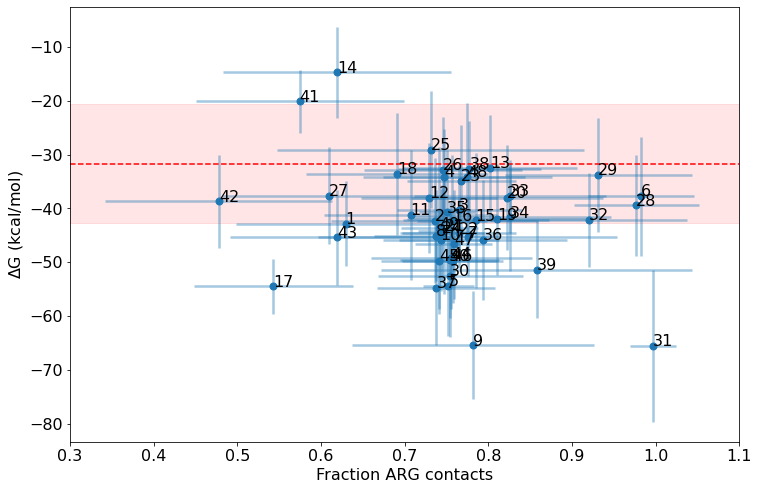

In [6]:
plt.figure(figsize=(12,8))
plt.rcParams['font.size'] = '16'
_,_, bars = plt.errorbar(arg_mean, gmx_mmpbsa,xerr=arg_std, yerr=gmx_mmpbsa_std, linestyle='None', marker='o', elinewidth=2.5, markersize=7)
[bar.set_alpha(0.4) for bar in bars]
plt.fill_between(np.arange(0,1.2,0.05),ref_gmx_mmpsba-load_gmx_mmpbsa[0,1], ref_gmx_mmpsba+load_gmx_mmpbsa[0,1], color='red', alpha=0.1)
plt.xlim([0.3,1.1])
plt.axhline(ref_gmx_mmpsba, linestyle='--', color='r')

for i in range(1,50):
    plt.text(arg_mean[i-1], gmx_mmpbsa[i-1],i)

plt.xlabel('Fraction ARG contacts')
plt.ylabel(r'$\Delta$G (kcal/mol)')
#plt.savefig('gmxmmpbsanoie_argfraccontacts.png',dpi=300, bbox_inches='tight', facecolor='white')

Text(0, 0.5, '$\\Delta$G (kcal/mol)')

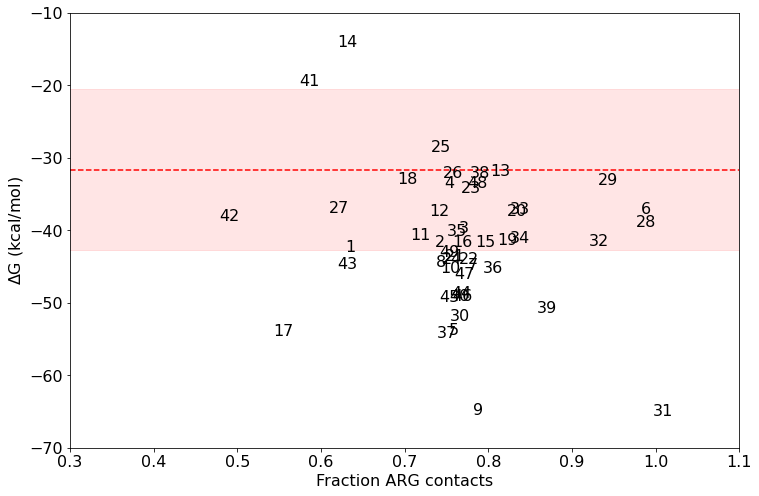

In [17]:
plt.figure(figsize=(12,8))
plt.rcParams['font.size'] = '16'
plt.fill_between(np.arange(0,1.2,0.05),ref_gmx_mmpsba-load_gmx_mmpbsa[0,1], ref_gmx_mmpsba+load_gmx_mmpbsa[0,1], color='red', alpha=0.1)
plt.xlim([0.3,1.1])
plt.axhline(ref_gmx_mmpsba, linestyle='--', color='r')

for i in range(1,50):
    plt.text(arg_mean[i-1], gmx_mmpbsa[i-1],i)

plt.ylim([-70,-10])

plt.xlabel('Fraction ARG contacts')
plt.ylabel(r'$\Delta$G (kcal/mol)')
#plt.savefig('gmxmmpbsanoie_argfraccontacts.png',dpi=300, bbox_inches='tight', facecolor='white')

## Sequence identities

In [66]:
seq= ['SAWAEAEARWAALEA','SDWLEAQARWEALEA','SAWAEAERRWAELEA','SAWLEAERRWAALEA','DAWALAEARWAELEA','SAWLEAQARWEALEA','AEAEARWAALEAATP','SARWLEGQALWDALE','SDWLLAQARWEALEA','DAWLEAQARWEELEA','SAAWLEGQARWEALE']

## gmx-mmpbsa IE vs contacts

In [140]:
load_gmx_mmpbsa = np.genfromtxt('gmx_mmpbsa_be_yesie.txt')
ref_gmx_mmpsba = load_gmx_mmpbsa[0,0]
gmx_mmpbsa = load_gmx_mmpbsa[1:,0]
gmx_mmpbsa_std = load_gmx_mmpbsa[1:,1]

Text(0, 0.5, '$\\mathrm{\\Delta G_{IE}}$ (kcal/mol)')

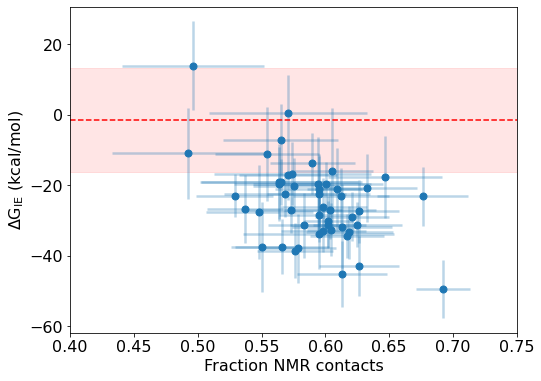

In [144]:
plt.figure(figsize=(8,6))
plt.rcParams['font.size'] = '16'
_,_, bars = plt.errorbar(nmr_mean, gmx_mmpbsa,xerr=nmr_std, yerr=gmx_mmpbsa_std, linestyle='None', marker='o', elinewidth=2.5, markersize=7)
[bar.set_alpha(0.3) for bar in bars]
plt.axhline(ref_gmx_mmpsba, linestyle='--', color='r')

plt.fill_between(np.arange(0,1.2,0.05),ref_gmx_mmpsba-load_gmx_mmpbsa[0,1], ref_gmx_mmpsba+load_gmx_mmpbsa[0,1], color='red', alpha=0.1)
plt.xlim([0.4,0.75])

plt.xlabel('Fraction NMR contacts')
plt.ylabel(r'$\mathrm{\Delta G_{IE}}$ (kcal/mol)')

Text(0, 0.5, '$\\mathrm{\\Delta G_{IE}}$ (kcal/mol)')

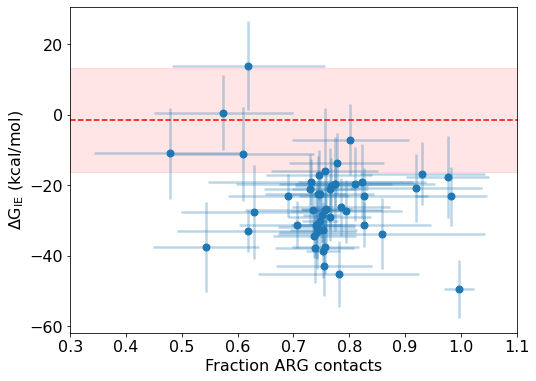

In [143]:
plt.figure(figsize=(8,6))
plt.rcParams['font.size'] = '16'
_,_, bars = plt.errorbar(arg_mean, gmx_mmpbsa,xerr=arg_std, yerr=gmx_mmpbsa_std, linestyle='None', marker='o', elinewidth=2.5, markersize=7)
[bar.set_alpha(0.3) for bar in bars]
plt.axhline(ref_gmx_mmpsba, linestyle='--', color='r')

plt.fill_between(np.arange(0,1.2,0.05),ref_gmx_mmpsba-load_gmx_mmpbsa[0,1], ref_gmx_mmpsba+load_gmx_mmpbsa[0,1], color='red', alpha=0.1)
plt.xlim([0.3,1.1])

plt.xlabel('Fraction ARG contacts')
plt.ylabel(r'$\mathrm{\Delta G_{IE}}$ (kcal/mol)')

# g_mmpbsa

In [4]:
def gmmpbsa_stats(dir):
    dir = str(dir)
    mm = np.genfromtxt(dir+'/mmpbsa16.txt')[:,-1]
    return mm.mean(), mm.std()

In [5]:
gmm_mean = []
gmm_std = []
for i in range(0,50):
    x = gmmpbsa_stats(i)
    gmm_mean.append(x[0])
    gmm_std.append(x[1])

In [6]:
ref_gmm_mean = np.array(gmm_mean[0])/4.2
ref_gmm_std = np.array(gmm_std[0])/4.2

gmm_mean = np.array(gmm_mean[1:])/4.2
gmm_std = np.array(gmm_std[1:])/4.2

## g_mmpbsa vs contacts

Text(0, 0.5, '$\\Delta$G (kcal/mol)')

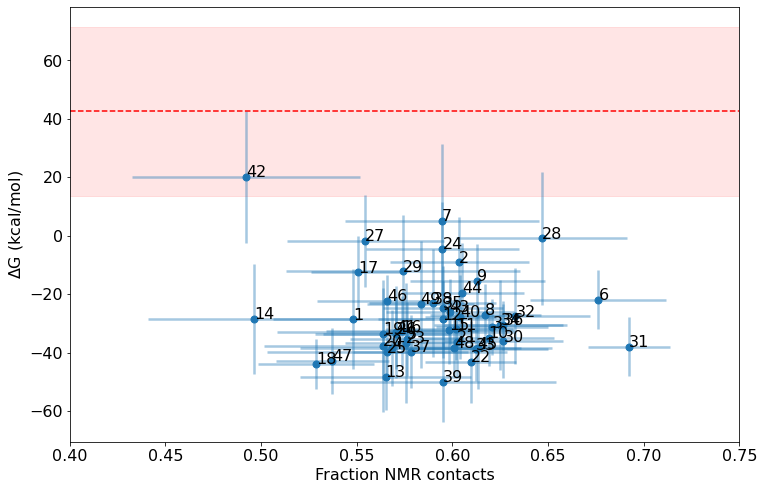

In [7]:
plt.figure(figsize=(12,8))
plt.rcParams['font.size'] = '16'
_,_, bars = plt.errorbar(nmr_mean, gmm_mean,xerr=nmr_std, yerr=gmm_std, linestyle='None', marker='o', elinewidth=2.5, markersize=7)
[bar.set_alpha(0.4) for bar in bars]
plt.fill_between(np.arange(0,1.2,0.05),ref_gmm_mean-ref_gmm_std, ref_gmm_mean+ref_gmm_std, color='red', alpha=0.1)
plt.xlim([0.4,0.75])
#plt.ylim([-70,-10])
plt.axhline(ref_gmm_mean, linestyle='--', color='r')
for i in range(1,50):
    plt.text(nmr_mean[i-1], gmm_mean[i-1],i)
plt.xlabel('Fraction NMR contacts')
plt.ylabel(r'$\Delta$G (kcal/mol)')
#plt.savefig('gmxmmpbsanoie_nmrfraccontacts.png',dpi=300, bbox_inches='tight', facecolor='white')

Text(0, 0.5, '$\\Delta$G (kcal/mol)')

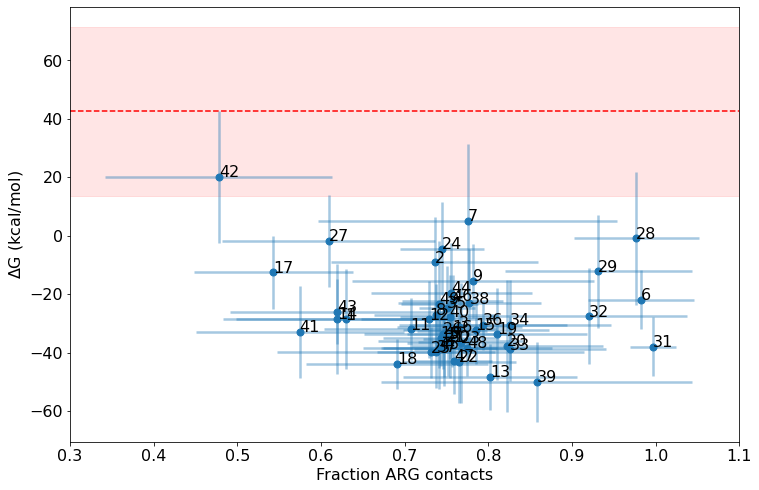

In [8]:
plt.figure(figsize=(12,8))
plt.rcParams['font.size'] = '16'
_,_, bars = plt.errorbar(arg_mean, gmm_mean,xerr=arg_std, yerr=gmm_std, linestyle='None', marker='o', elinewidth=2.5, markersize=7)
[bar.set_alpha(0.4) for bar in bars]
plt.fill_between(np.arange(0,1.2,0.05),ref_gmm_mean-ref_gmm_std, ref_gmm_mean+ref_gmm_std, color='red', alpha=0.1)
plt.xlim([0.3,1.1])
#plt.ylim([-70,-10])
plt.axhline(ref_gmm_mean, linestyle='--', color='r')
for i in range(1,50):
    plt.text(arg_mean[i-1], gmm_mean[i-1],i)
plt.xlabel('Fraction ARG contacts')
plt.ylabel(r'$\Delta$G (kcal/mol)')
#plt.savefig('gmxmmpbsanoie_nmrfraccontacts.png',dpi=300, bbox_inches='tight', facecolor='white')